## Data Visualisation in Python - Session 2

This notebook will work to introduce the topics of seaborne and plotnine to expand your data visualisation repetoire. 
There is no require to use any of these modules of code - you can just as easily expand on the work we have done in matplotlib in order to build you data visualisations for your report. 

Starting with seaborne - this is a data visualisation submodule that is built on top of matplotlib that is specifically set up to work with pandas. 
To exploring these submodule we will use an in built dataset called "tips" that seaborne installs with.

In [1]:

# first install seaborne if needed - if not - comment this out!
#!pip install seaborn

# Import seaborn
import seaborn as sns 

# Import our basic plot functions too for comparison
import matplotlib.pyplot as plt
import matplotlib as mpl


In [5]:
# Load the example dataset
tips = sns.load_dataset("tips")

#let's have a look at what's inside here
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# check what size this datframe is so we know how to handle these columns
tips.shape

#remember this is an attribute not a method/function so no brackets required! 


(244, 7)

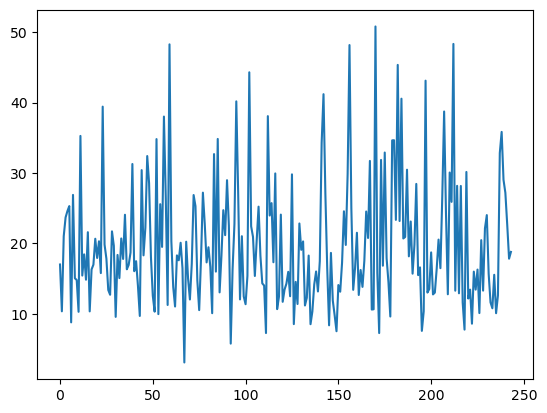

In [9]:
#what happens if we try to plot this in matplotlibs standard plotting functions? 


plt.plot(tips["total_bill"])
plt.show()

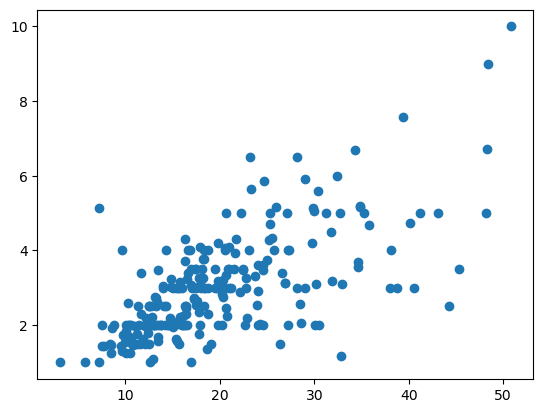

In [11]:
#try the default settings for out x and y vars as total_bill and tips

plt.plot(tips["total_bill"], tips["tip"], "o")
plt.show()


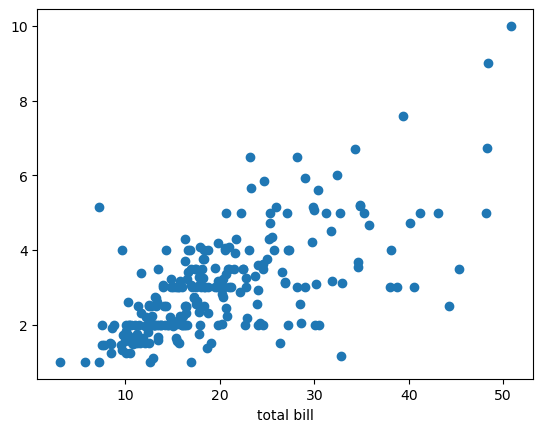

In [13]:
# chaos - quickly add some customisation to make this a scatterplot that is more meaningful!
plt.plot(tips["total_bill"], tips["tip"], "o")
plt.xlabel("total bill")




plt.show()

Okay - so we can build a basic plot in matplotlib pretty quickly - the easy things are easy. 
However, there are lots more variables here that we could play with that could make this data visualistion more meaningful!
It's not that we could add these in in matplotlib - but it gets tricky to do pretty quickly when layering and customing across the plot. 

Instead - let's try to do this with seaborne! 
We will start with a .relplot() a "relationship plot" perfect for trying to capture the relationship between an x and a y variable. 

Note that seaborne expects to work with a pandas dataframe - so we do not need to call each column longhand (i.e. data["column_name"])but can call them just by column name like in matplotlib to pass to our x and y arguments - let's see what I mean! 

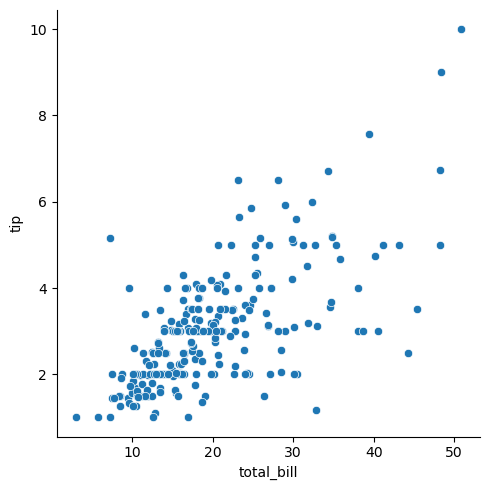

In [15]:
# in the relplot() you must tell seaborne what data you want to use, what your x is and what you y is. 
# More specifically, only data may be sepcified as a positional arguemtn, all others must be specified as keyword arguments.

sns.relplot(data = tips,x = "total_bill", y = "tip")


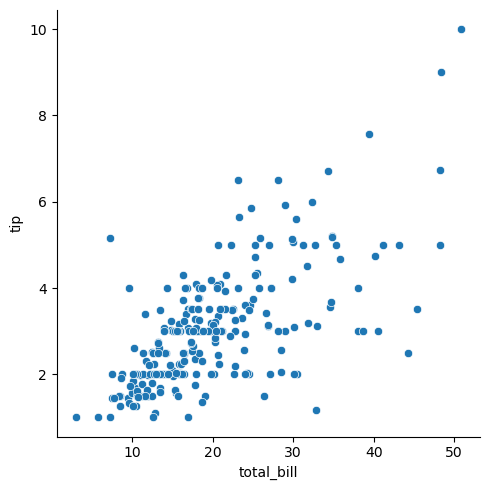

In [17]:
#seaborn works with matplotlib so we can "show" it in the same way here

sns.relplot(data = tips,x = "total_bill", y = "tip")
plt.show()

Notice a few things here - some of the defaults are the same - i.e. color is blue. 
Some are different - the default is not a line plot that we have to override using "o" but a scatter plot. 
If we wanted it to be a line plot we would add and argument kind = "line" to our function call. 


Note also that the x and y labels are automatically set using the names of the variables we gave them - maybe this is not the tidiest labelling but it is a good start as it mean we can identify the x and y axis immediately. 

Seaborne also has some broad aesthetic customizations we can apply using the .set_theme() function which quickly helps to customise the plot to a particular aesthetic. This can be useful to stylise your plots in a consistent way. 

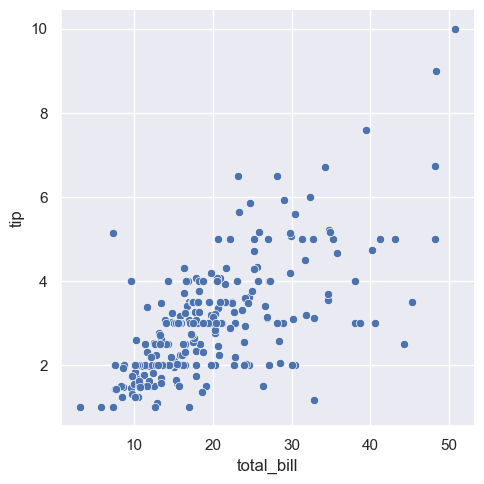

In [21]:
# Apply the default theme
sns.set_theme()

sns.relplot(data = tips,x = "total_bill", y = "tip")
plt.show()

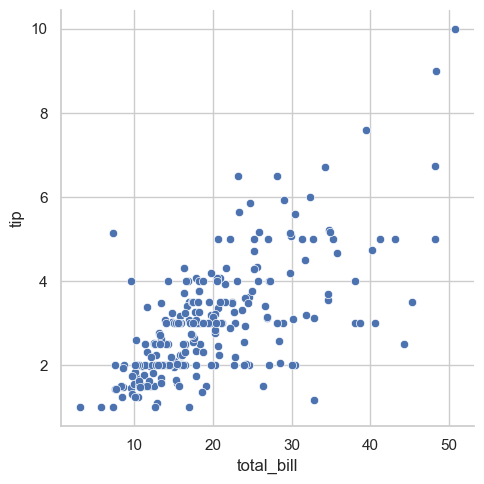

In [23]:
#try a new theme  to one of the defualt options (we can explore this more later)

sns.set_theme(style = "whitegrid")

sns.relplot(data = tips,x = "total_bill", y = "tip")
plt.show()


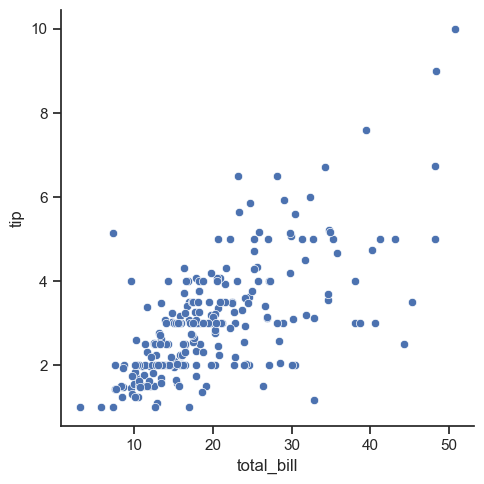

In [25]:
#try another theme
sns.set_theme(style = "ticks")

sns.relplot(data = tips,x = "total_bill", y = "tip")
plt.show()


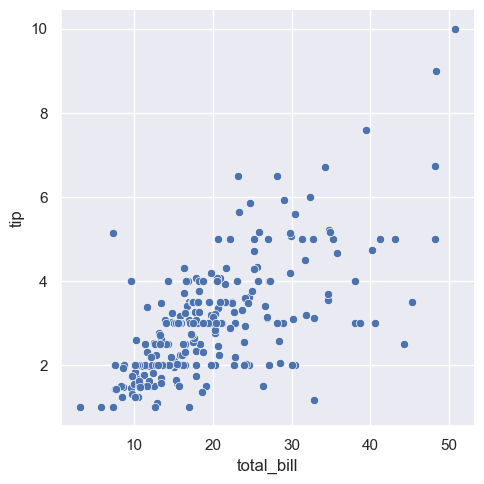

In [27]:
# explicitly set the default theme 

sns.set_theme(style = "darkgrid")

sns.relplot(data = tips,x = "total_bill", y = "tip")
plt.show()

If we wanted to add some labels we can do it ina  few ways - mostly by interfacing with matplotlib again (because the figure object that seaborne genertes is recognised and therefore customiseable in matplotlib using our normal pyplot approaches). 

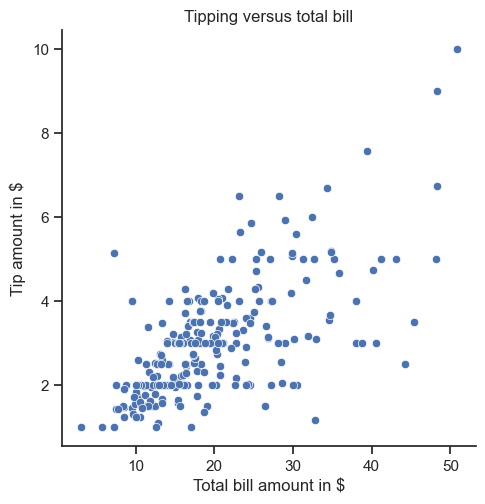

In [31]:
#add labels in the standard way 

sns.set_theme(style = "ticks")

sns.relplot(data = tips,x = "total_bill", y = "tip")
plt.xlabel("Total bill amount in $")
plt.ylabel("Tip amount in $")
plt.title("Tipping versus total bill")
plt.show()

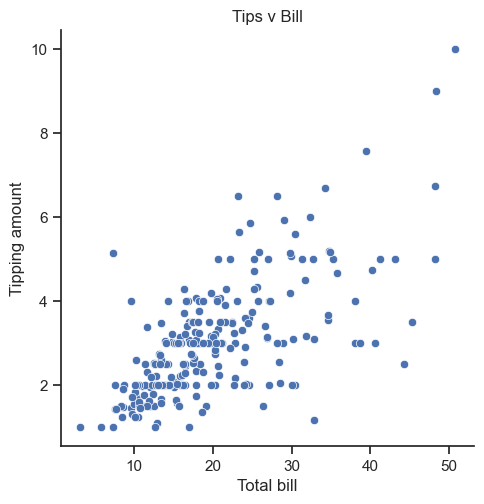

In [33]:
#You can also use the object oriented approach as follows:

sns.set_theme(style = "ticks")

ax = sns.relplot(data = tips,x = "total_bill", y = "tip")
ax.set(xlabel = "Total bill", ylabel = "Tipping amount", title = "Tips v Bill")

plt.show()


Okay - so we can quickly and easily plot columns of a pandas dataframe and roughly replicate the plots we made before - so what? 

Well, seaborne quickly gets fancy and complex - and pretty easily!
So far we have only two variables represented - what if we wanted to explore another using color to represent a third dimension? 

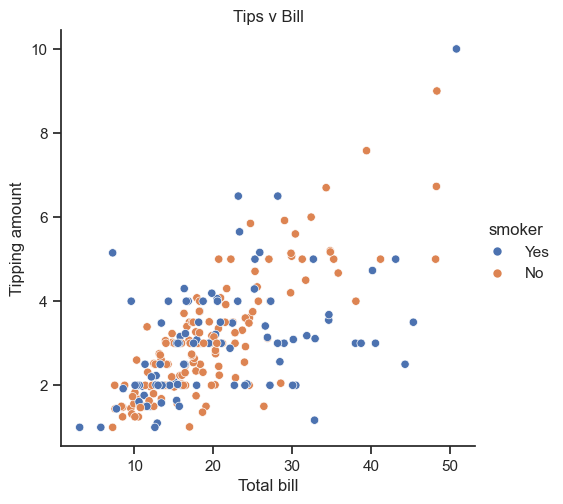

In [35]:
#Let's set color equal to our "smoker" variable - it is a categorical (discreet) variable that represents smoking status

sns.set_theme(style = "ticks")

ax = sns.relplot(data = tips,
                 x = "total_bill", 
                 y = "tip",
                hue = "smoker")


ax.set(xlabel = "Total bill", ylabel = "Tipping amount", title = "Tips v Bill")

plt.show()

We can also specify color in another way if we want.... 

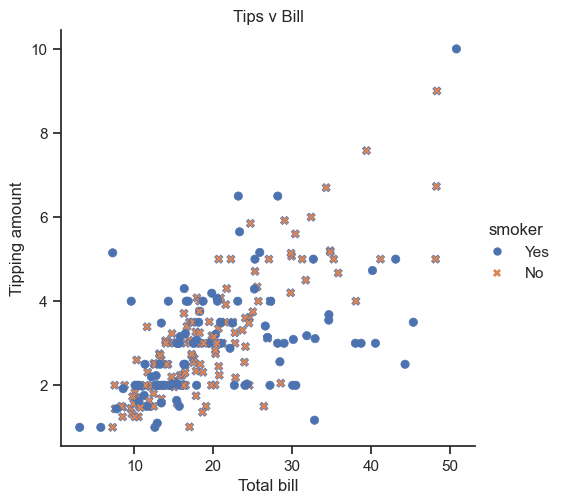

In [39]:
# the edgecolor argument handles the color of the edges of our data points and differentiates them
# can look very messy here
sns.set_theme(style = "ticks")

ax = sns.relplot(data = tips,
                 x = "total_bill", 
                 y = "tip",
                hue = "smoker",
                style = "smoker", 
                edgecolor = "b")


ax.set(xlabel = "Total bill", ylabel = "Tipping amount", title = "Tips v Bill")

plt.show()


Notice that the legend is automatically applied (Yay no extra lines of code and no worrying about the list order to pass off to teh standard plt.legend() function!

We can personalise this further by differentiating not just by color hue but also by style (remember the good accessibility practice to differenctiate not just by color but also by icon/shape for color impairments and general clarity?)

In [ ]:
# the style argument handles the shape of our data points and differentiates them 



Let's go one set further and represent the size of the dining party on this plot as well. 
The "size" variable tells us about the number of guests in each dining party - let's include this information in our plot too. 

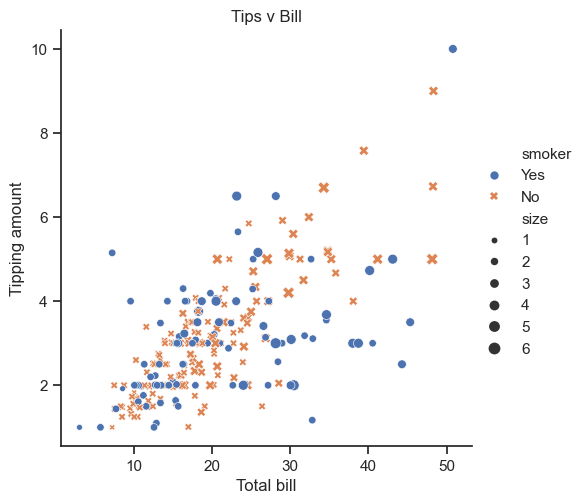

In [41]:
# the size argument handles the size of our data points and differentiates them - it takes a numerical variable 
sns.set_theme(style = "ticks")

ax = sns.relplot(data = tips,
                 x = "total_bill", 
                 y = "tip",
                hue = "smoker",
                style = "smoker", 
                size = "size")

ax.set(xlabel = "Total bill", ylabel = "Tipping amount", title = "Tips v Bill")

plt.show()


Now, the bigger the data point the bigger the party was - as shown by the secon legend that also automatically generates! 

However, this is getting a bit cluttered, too much data and customisation ona  single plot. 

What if we wanted to pull these data apart and compare the diners at lunch and dinner in a set of two subplots? This would help us have less clutter on each axes object and would also let us compare the relationship at different times. 

Now - in matplotlib we standardly used object oriented and set up a matrix of axes that we could customise individually... in seaborne we don't have to do that (thank goodness!). Seaborne makes the hard things easy! 


For this we will use the "time" variable in our data... and the col argument in seaborne.

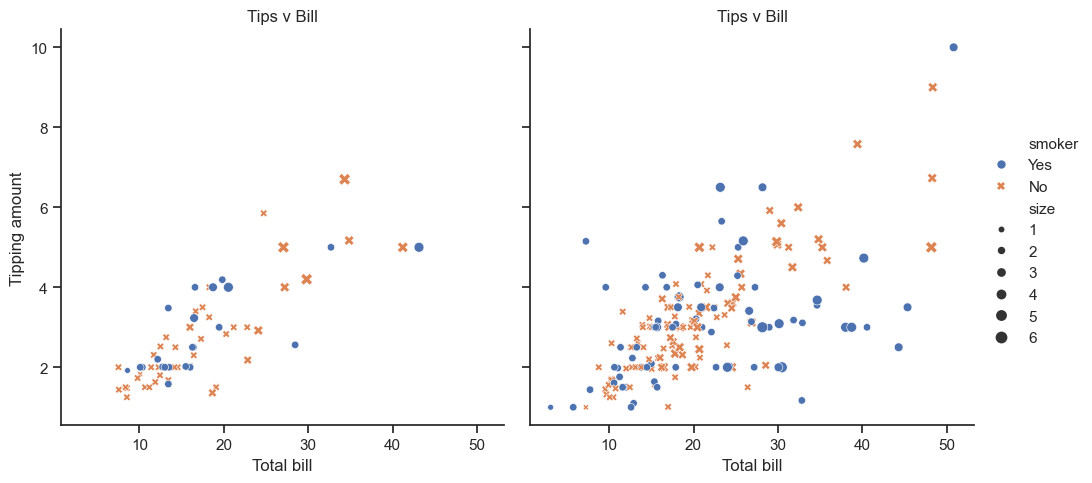

In [43]:
# col is a column argument, it will split your plot into subplots based on the number of unique categories/strings in your variable
# it essentially creates a new axes column for each unique item in your variable 
# here "time" has two unique values - "dinner" and "lunch" so it will make two subplots
# if you had a gender column with 3 or more categories, it could compare these for you easily across as many subplots as you wanted! 


sns.set_theme(style = "ticks")

ax = sns.relplot(data = tips,
                 x = "total_bill", 
                 y = "tip",
                hue = "smoker",
                style = "smoker", 
                size = "size", 
                col = "time")

ax.set(xlabel = "Total bill", ylabel = "Tipping amount", title = "Tips v Bill")

plt.show()


Now, let's get more complex again - in seaborne we can quickly and easily add a regression line to our scatter plots - even to our individual subplots!


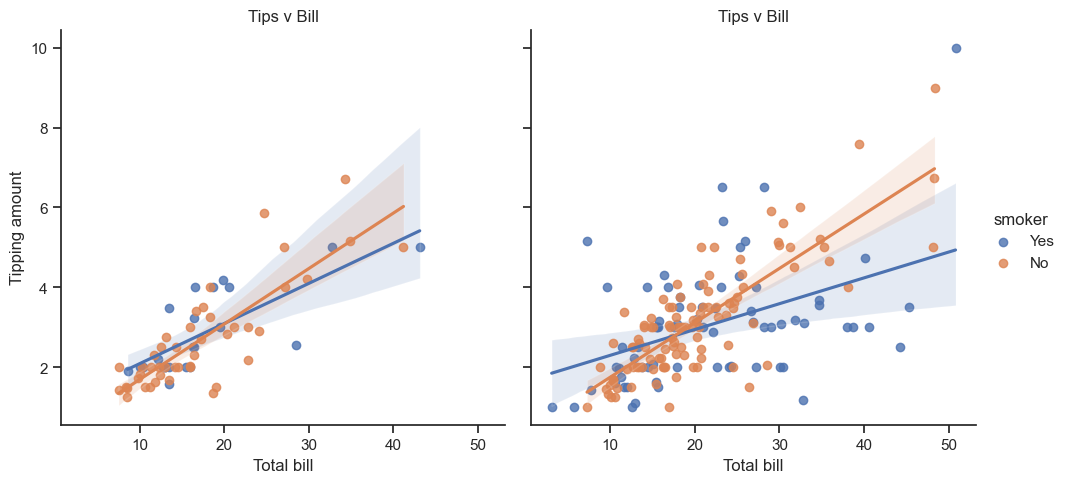

In [45]:
# use an lmplot() - a linear model plot - to do just that

ax = sns.lmplot(data = tips, x = "total_bill", y = "tip", hue = "smoker", col = "time")
ax.set(xlabel = "Total bill", ylabel = "Tipping amount", title = "Tips v Bill")

plt.show()

Statistical analyses require knowledge about the distribution of variables in your dataset - is a regression model even valid here?
The seaborn function displot() supports several approaches to visualizing distributions. 
These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

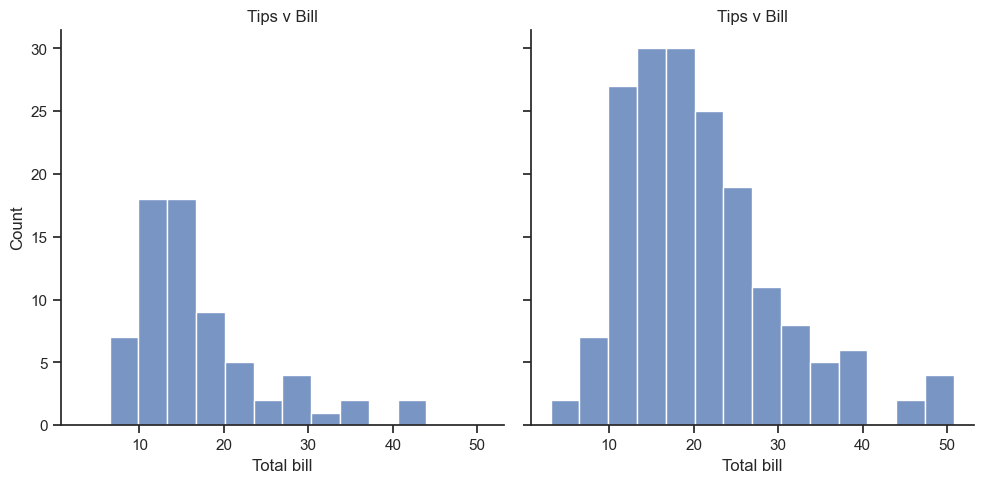

In [51]:
# use the .displot() function to estimate the distributions of your variables in a histogram
ax = sns.displot(data = tips, x = "total_bill", col = "time")
ax.set(xlabel = "Total bill", title = "Tips v Bill")

plt.show()

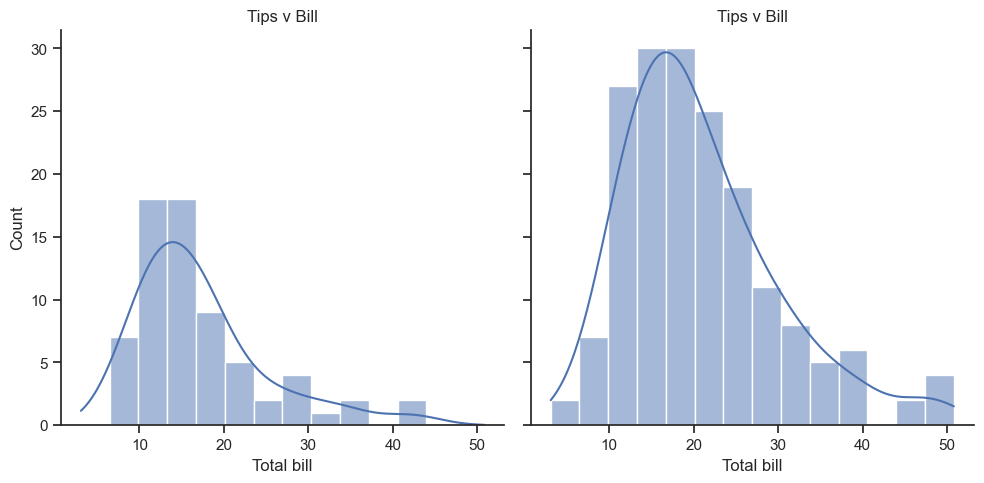

In [53]:
# use the .displot() function to estimate the distributions of your variables - now using kernel density estimates
ax = sns.displot(data = tips, x = "total_bill", col = "time", kde = True)
ax.set(xlabel = "Total bill", title = "Tips v Bill")

plt.show()


Several specialized plot types in seaborn are for visualizing categorical data using catplot(). These plots offer different levels of granularity. At the finest level, you may wish to see every observation by drawing a “swarm” plot: a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap:

C:\Users\sa4422\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


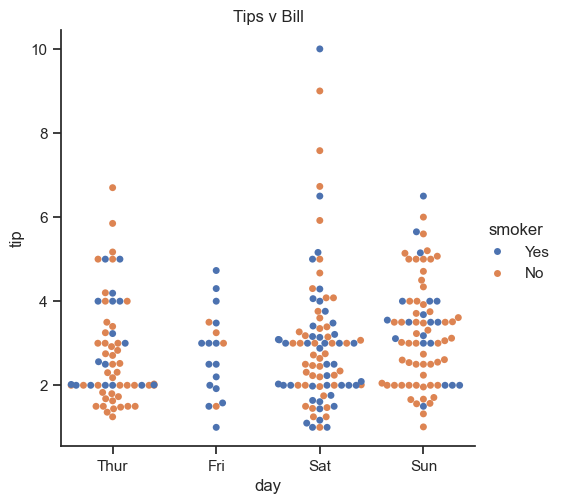

In [65]:
#use catplot and kind = "swarm" to visualise your data differently - splitting up across days and not using col to make subplots!

ax = sns.catplot(data = tips, kind = "swarm", x = "day", y = "tip", hue = "smoker")
ax.set(title = "Tips v Bill")

plt.show()

Or we could use kernel density estimation (violin plots!) to represent the underlying distribution that the points are sampled from:

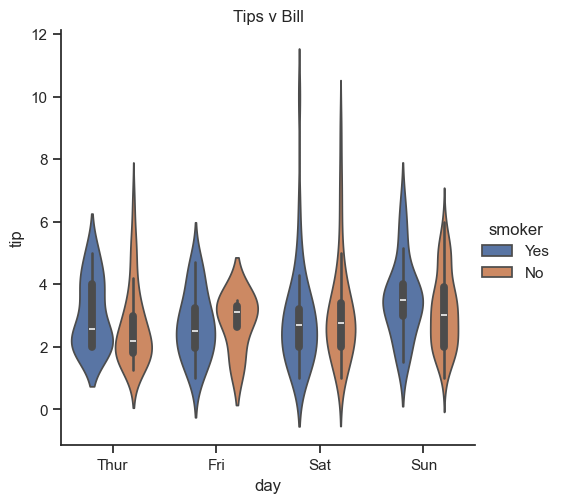

In [67]:
# make some violin plots by specifying kind = "violin"  in the catplot() function


ax = sns.catplot(data = tips, kind = "violin", x = "day", y = "tip", hue = "smoker")
ax.set(title = "Tips v Bill")

plt.show()

Or - we could plot out the categories as par tof a bar chart (with automatic confidence intervals!)

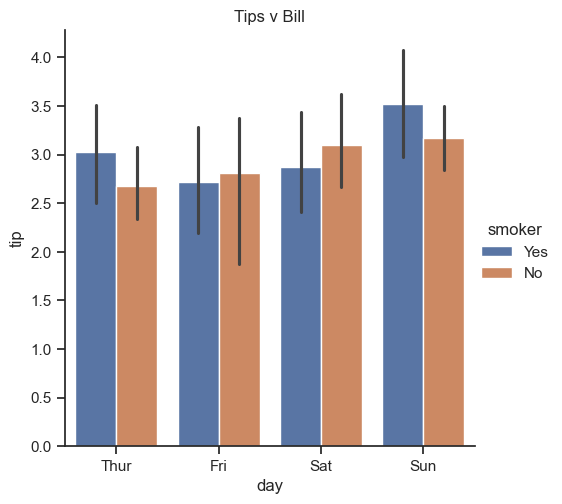

In [69]:
# use kind = "bar" to achieve this! 

ax = sns.catplot(data = tips, kind = "bar", x = "day", y = "tip", hue = "smoker")
ax.set(title = "Tips v Bill")

plt.show()

Using color in your plots is important - in seaborne using color palettes is particularly useful!

We will start with sequential color palettes - with a set order that will be applied as each new color is needed. 

In [ ]:
sns.color_palette() #this is the default colour palette - we can vary this default in a number of ways!

In [ ]:
# try my favorite - for obvious reasons

We can also use any color palettes from the interdisciplinary data viz tool Color Brewer (also used in R!). 

This has palettes that are different lengths and also has continous color palettes (not just sequential!)

In [ ]:
#continuous and relatively perceptually uniformed


In [ ]:
#from matplotlib

In [ ]:
#reverse any of these using the _r command

Let's apply some of these colors to one of our plots! 

In [ ]:
# it is sensible, and good practice, to set you colormap at the start of your plotting alongside your theme for consistency
# change up the palette here to one of our sequential colormaps

